<a href="https://colab.research.google.com/github/dharapatel2908/Oasis-Internship/blob/main/IRIS_FLOWER_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing** **Modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# **Loading the** **Dataset**

In [ ]:
from google.colab import files
data = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
data = pd.read_csv('Iris.csv')

# **Preprocessing the Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.shape

(150, 6)

In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Iris_setosa = data[data['Species']== 'Iris-setosa'].value_counts().sum()
print("Number of Iris Setosa=", Iris_setosa)

Number of Iris Setosa= 50


In [ ]:
Iris_versicolor = data[data['Species']== 'Iris-versicolor'].value_counts().sum()
print("Number of Iris versicolor =", Iris_versicolor)

Number of Iris versicolor= 50


In [ ]:
Iris_virginica = data[data['Species']== 'Iris-virginica'].value_counts().sum()
print("Number of Iris virginica =", Iris_virginica)

Number of Iris virginica = 50


# **Exploratory Data Analysis**

<Axes: >

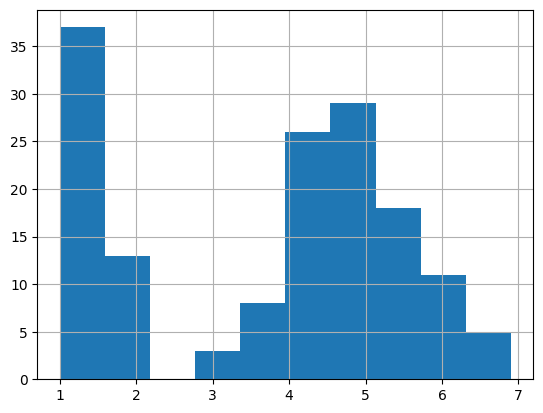

In [ ]:
data['PetalLengthCm'].hist()

<Axes: >

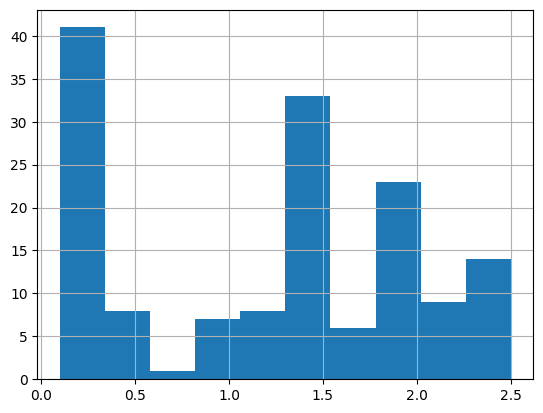

In [ ]:
data['PetalWidthCm'].hist()

<Axes: >

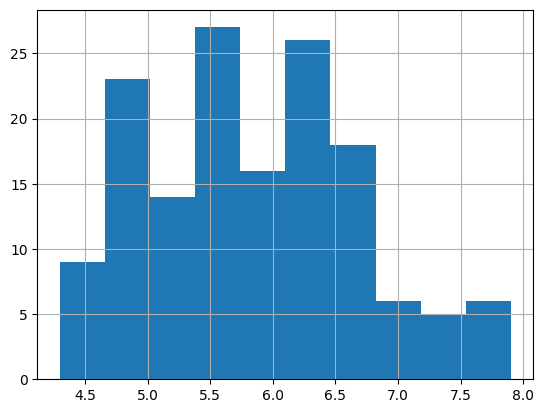

In [ ]:
data['SepalLengthCm'].hist()

<Axes: >

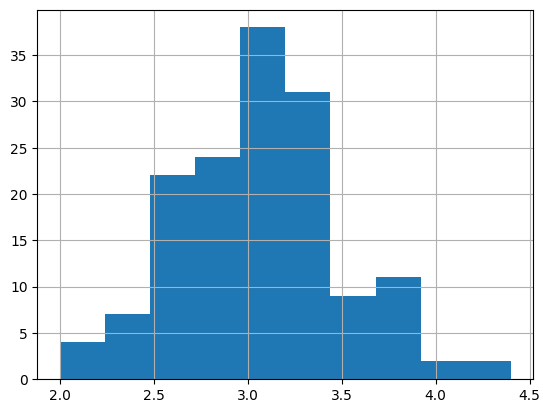

In [ ]:
data['SepalWidthCm'].hist()

In [ ]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<ipython-input-28-dc64161f89a8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax, cmap='plasma')


<Axes: >

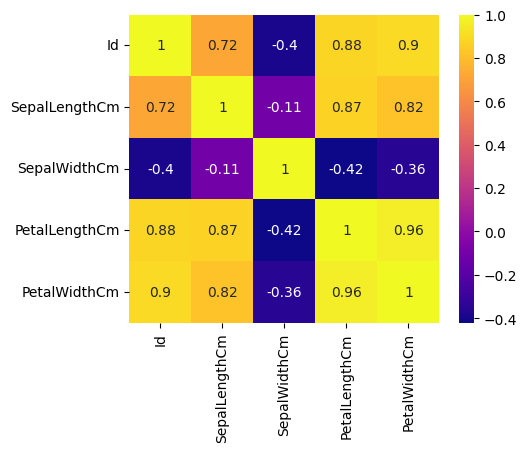

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='plasma')

# **Model Training**

In [ ]:
X = data.drop(columns=['Species'])
y = data['Species']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.35)

In [ ]:
model1= LogisticRegression()
model1.fit(x_train,y_train)
Accuracy = model1.score(x_test,y_test)*100
print(Accuracy)

98.11320754716981


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model2= KNeighborsClassifier()
model2.fit(x_train,y_train)
Accuracy2 = model2.score(x_test,y_test)*100
print(Accuracy2)

98.11320754716981


In [ ]:
model3= DecisionTreeClassifier()
model3.fit(x_train,y_train)
Accuracy3 = model3.score(x_test,y_test)*100
print(Accuracy3)

100.0


# **Classification Result**

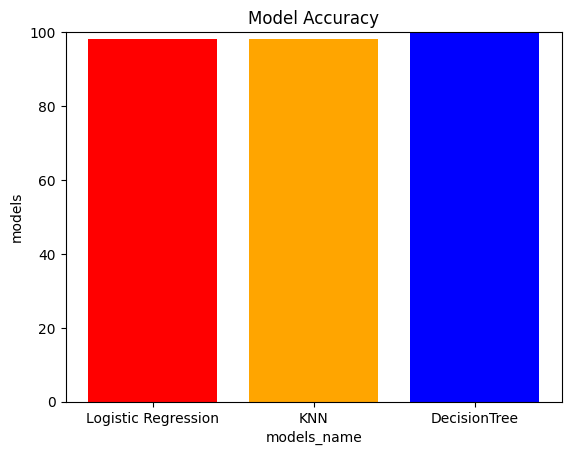

In [ ]:
models = [Accuracy,Accuracy2,Accuracy3]
models_name = ['Logistic Regression','KNN','DecisionTree']
plt.bar(models_name,models,color=['red', 'orange', 'blue'])
plt.xlabel('models_name')
plt.ylabel('models')
plt.title('Model Accuracy')
plt.ylim([0,100])
plt.show()